#### Import Relevant Libraries 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Load & Inspect Dataset

In [3]:
df=pd.read_csv("income data set with answers.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,19,Private,105460,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
1,36,Private,273604,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,41,Private,125461,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,>50K
3,46,Private,175925,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
4,30,Private,243867,Some-college,10,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,United-States,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
46394,39,Private,174242,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K
46395,66,Self-emp-inc,197816,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,10605,0,40,United-States,>50K
46396,32,Private,80058,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
46397,30,?,201196,11th,7,Never-married,?,Own-child,Black,Female,0,0,40,United-States,<=50K
46398,34,Private,154120,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46399 entries, 0 to 46398
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46399 non-null  int64 
 1   workclass        46399 non-null  object
 2   fnlwgt           46399 non-null  int64 
 3   education        46399 non-null  object
 4   educational-num  46399 non-null  int64 
 5   marital-status   46399 non-null  object
 6   occupation       46399 non-null  object
 7   relationship     46399 non-null  object
 8   race             46399 non-null  object
 9   gender           46399 non-null  object
 10  capital-gain     46399 non-null  int64 
 11  capital-loss     46399 non-null  int64 
 12  hours-per-week   46399 non-null  int64 
 13  native-country   46399 non-null  object
 14  income           46399 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.3+ MB


#### Handle Missing Values (NaN and ? in data)

In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(46)

In [10]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3977,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5240,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
7263,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
10280,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13767,19,Private,139466,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
16609,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
19139,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,<=50K
19632,19,Private,318822,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
20151,43,Private,195258,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
20808,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K


In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

np.int64(0)

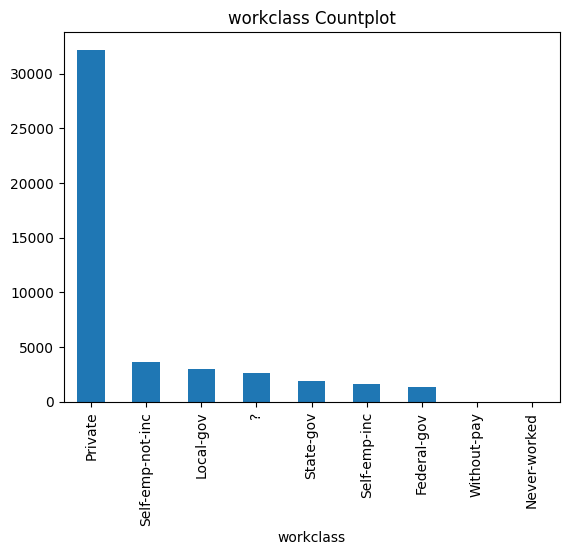

In [13]:
df['workclass'].value_counts().plot(kind='bar')
plt.title('workclass Countplot')
plt.show()

In [14]:
df['workclass'] = df['workclass'].replace('?', 'Private')


In [15]:
df['age'].unique()

array([19, 36, 41, 46, 30, 37, 54, 42, 31, 38, 25, 29, 44, 56, 22, 50, 62,
       49, 21, 87, 48, 18, 35, 34, 20, 17, 59, 72, 39, 26, 47, 55, 28, 45,
       27, 61, 52, 57, 24, 40, 23, 53, 60, 51, 32, 33, 43, 71, 66, 78, 58,
       65, 69, 90, 68, 75, 70, 64, 79, 77, 63, 89, 73, 76, 67, 82, 74, 81,
       80, 88, 85, 83, 84, 86])

In [16]:
df['fnlwgt'].unique()

array([105460, 273604, 125461, ..., 146576, 195081, 201196],
      shape=(27599,))

In [17]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
df['education'].unique()

array(['Some-college', 'Bachelors', 'HS-grad', '9th', 'Assoc-acdm',
       '11th', 'Assoc-voc', '7th-8th', '1st-4th', '12th', '10th',
       'Masters', '5th-6th', 'Prof-school', 'Preschool', 'Doctorate'],
      dtype=object)

In [19]:
df['educational-num'].unique()

array([10, 13,  9,  5, 12,  7, 11,  4,  2,  8,  6, 14,  3, 15,  1, 16])

In [20]:
df['marital-status'].unique()

array(['Never-married', 'Divorced', 'Married-civ-spouse',
       'Married-spouse-absent', 'Widowed', 'Separated',
       'Married-AF-spouse'], dtype=object)

In [21]:
df['occupation'].unique()

array(['Other-service', 'Craft-repair', 'Farming-fishing',
       'Prof-specialty', 'Machine-op-inspct', 'Sales', 'Adm-clerical',
       'Transport-moving', 'Exec-managerial', '?', 'Tech-support',
       'Handlers-cleaners', 'Priv-house-serv', 'Protective-serv',
       'Armed-Forces'], dtype=object)

In [22]:
df['race'].unique()

array(['White', 'Black', 'Other', 'Asian-Pac-Islander',
       'Amer-Indian-Eskimo'], dtype=object)

In [23]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['capital-gain'].unique()

array([    0,  5178,  3103,  8614, 99999,  7298,  2407,  6497,  2202,
        4386,  9386,  4101,  4508,  6418,  4064,   401,  7688, 10520,
        2907,  5013,  3325,  4650, 15024,  3674,  2635,  2174, 27828,
        2597,  2964, 15020,  2580,  3432,  5455,  3411, 13550,   594,
        6723,  3464, 14084,  3273,  4865,  6360,  4787, 20051,  3137,
       10605,  7430,  3818,  6849,  3781,  2829,  2176,  2329,  5556,
        1506,  7262,  3908,  6767,  2885,  2062,  4934,  2961,  4416,
        3418,  2463,  6097,  1055,  4931,  1848,  1424,  2977,  2653,
        2936,  1151,  3942, 14344,  1173,  1455,  3471,  5721, 25236,
        4687, 25124,  1409,  2105,  1797,  2354,  7896,   914,  2414,
        6514,  2346, 34095,  3456,  1831, 15831,  9562,  2050,   114,
        2036,  2993, 10566,  1471,  7443,  2290, 11678,  2009,  1086,
        2538,  7978,   991,  2228,  1111,  3887,  1264,  1639,  6612,
        5060,  2387, 22040, 18481,  1731, 41310])

In [25]:
df['capital-loss'].unique()

array([   0, 1902, 1848, 1887,  810, 1977, 2377, 1485, 2392, 2231, 2205,
       1504, 1672, 1741, 2824, 1719, 2415, 1602,  419, 1669, 1579, 1590,
       1721, 1258, 2754, 1648, 1876, 1564, 1740, 2246, 2467, 2258, 2603,
       2352, 1668, 2001, 1617,  880, 1138, 2057, 1408,  625, 2547, 1573,
       2489, 1628, 1762, 2051, 1825, 2042, 2179, 2174, 2559, 1974, 3770,
       1092, 1411, 2206, 1980, 2339, 1651, 3900, 3175, 1594, 2444, 2002,
       2472, 2080, 1380, 2238, 1944, 2267, 2129, 1340, 2163, 3004, 1911,
       2457, 1816, 1735, 1755, 2149, 1539, 1726,  323, 2465, 1429, 1844,
        155, 1421, 3683,  213, 2282, 1510,  974, 1870,  653, 2201, 4356])

In [26]:
df['hours-per-week'].unique()

array([20, 40, 45, 35, 36, 48, 84, 70,  2, 50, 15, 16, 52, 60, 24, 65, 30,
       37, 28, 21, 55, 25, 62, 13, 42,  8, 56, 99, 80, 57, 96, 12, 10, 18,
       38, 39, 14, 32, 72, 58,  9,  5, 17,  6, 27, 22, 87, 44, 41, 77,  3,
       46,  7, 54, 34, 47, 43, 63,  1, 59, 75, 67, 33,  4, 53, 51, 85, 66,
       26, 11, 49, 23, 90, 78, 29, 98, 64, 91, 31, 68, 73, 89, 92, 61, 88,
       86, 19, 81, 94, 74, 97, 76, 95, 82, 69, 79])

In [27]:
df['native-country'].unique()

array(['United-States', 'India', 'Dominican-Republic', 'Mexico', 'China',
       'Ecuador', '?', 'Philippines', 'Italy', 'Taiwan', 'Portugal',
       'South', 'Germany', 'Yugoslavia', 'Cuba', 'Jamaica', 'Guatemala',
       'Holand-Netherlands', 'Puerto-Rico', 'Hong', 'El-Salvador',
       'England', 'Laos', 'Ireland', 'Canada', 'Columbia', 'Japan',
       'Hungary', 'Thailand', 'Honduras', 'Greece', 'Iran',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Vietnam', 'Peru',
       'Haiti', 'France', 'Poland', 'Cambodia', 'Scotland', 'Nicaragua'],
      dtype=object)

In [28]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

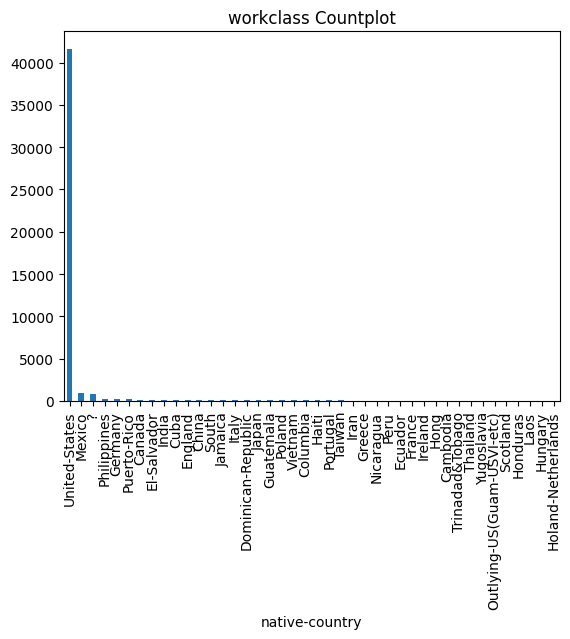

In [30]:
df['native-country'].value_counts().plot(kind='bar')
plt.title('workclass Countplot')
plt.show()

In [31]:
df['native-country'] = df['native-country'].replace('?', 'United-States')

#### EDA & Statistics

In [32]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,46353.000000,4.635300e+04,46353.000000,46353.000000,46353.000000,46353.000000
mean,38.646021,1.898417e+05,10.074429,1062.657519,88.374258,40.436110
std,13.707883,1.054027e+05,2.572169,7331.554048,405.018180,12.392521
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176740e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.379430e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
import Omkar_statistics

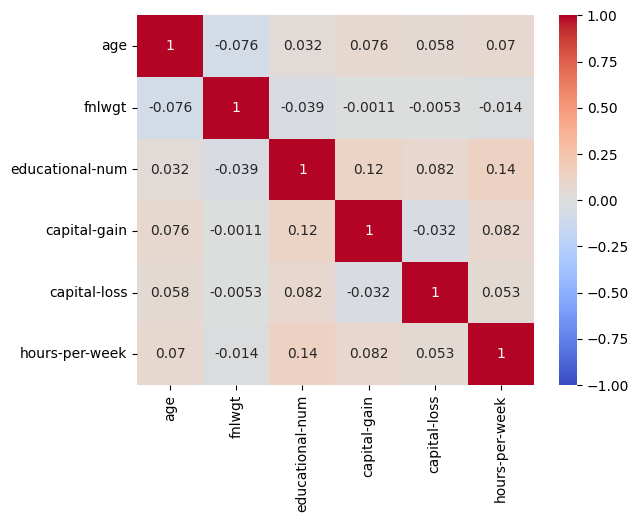

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True, vmin=-1,cmap='coolwarm')
plt.show()

age


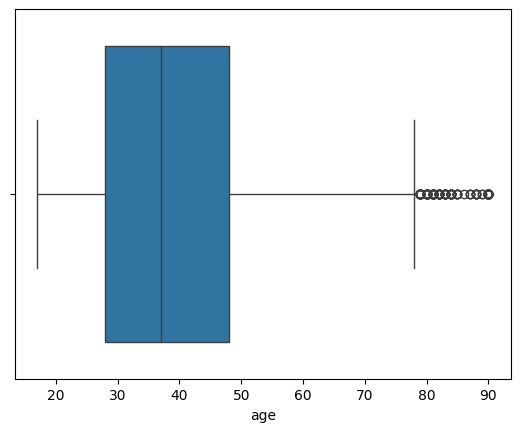

fnlwgt


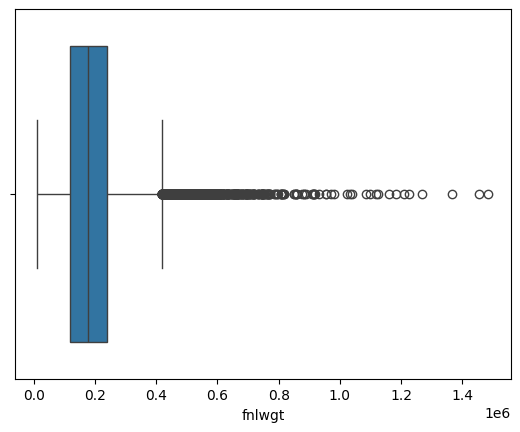

educational-num


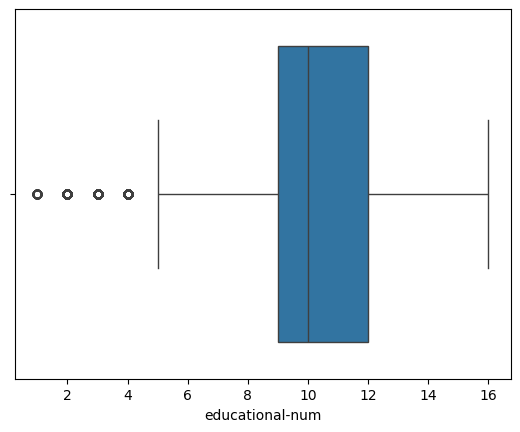

capital-gain


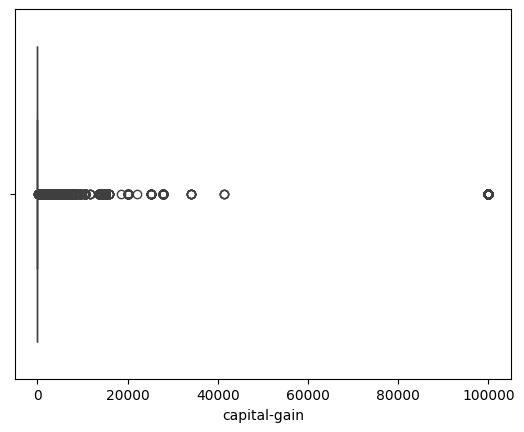

capital-loss


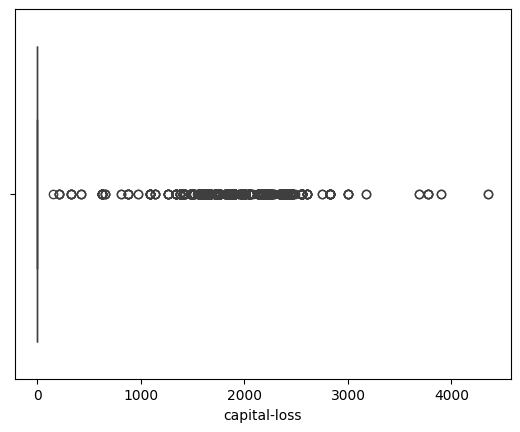

hours-per-week


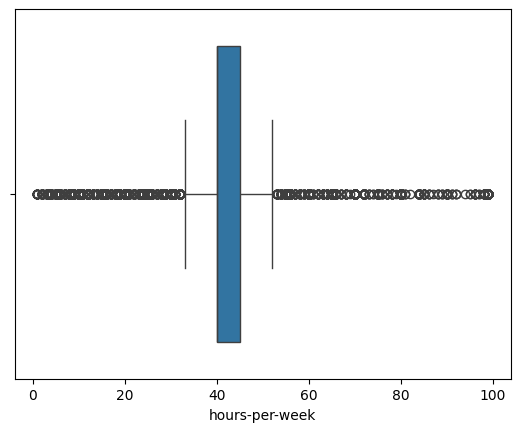

In [36]:
for col_name in df.select_dtypes('number').columns:
    print(col_name)
    sns.boxplot(df,x=col_name)
    plt.show()

#### Handle Outliers

In [52]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
lower_whisker=q1-iqr*1.5
upper_whisker=q1+iqr*1.5

In [53]:
df['age'][df['age']>upper_whisker]=upper_whisker

In [54]:
q1=df['fnlwgt'].quantile(0.25)
q3=df['fnlwgt'].quantile(0.75)
iqr=q3-q1
lower_whisker=q1-iqr*1.5
upper_whisker=q1+iqr*1.5

In [55]:
df['fnlwgt'][df['fnlwgt']>upper_whisker]=upper_whisker

In [63]:
#q1=df['educational-num'].quantile(0.25)
#q3=df['educational-num'].quantile(0.75)
#iqr=q3-q1
#lower_whisker=q1-iqr*1.5
#upper_whisker=q1+iqr*1.5

In [57]:
#df['educational-num'][df['educational-num']>upper_whisker]=upper_whisker

In [64]:
#q1=df['capital-gain'].quantile(0.25)
#q3=df['capital-gain'].quantile(0.75)
#iqr=q3-q1
#lower_whisker=q1-iqr*1.5
#upper_whisker=q1+iqr*1.5

In [65]:
#df['capital-gain'][df['capital-gain']>upper_whisker]=upper_whisker

In [66]:
#q1=df['capital-loss'].quantile(0.25)
#q3=df['capital-loss'].quantile(0.75)
#iqr=q3-q1
#lower_whisker=q1-iqr*1.5
#upper_whisker=q1+iqr*1.5

In [67]:
#df['capital-loss'][df['capital-loss']>upper_whisker]=upper_whisker

age


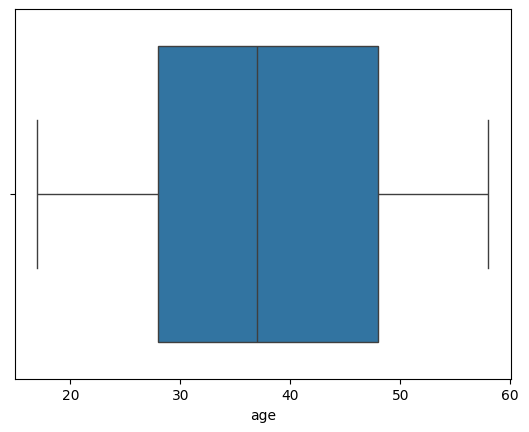

fnlwgt


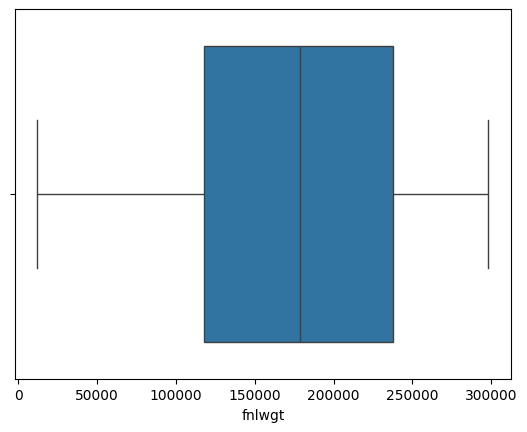

educational-num


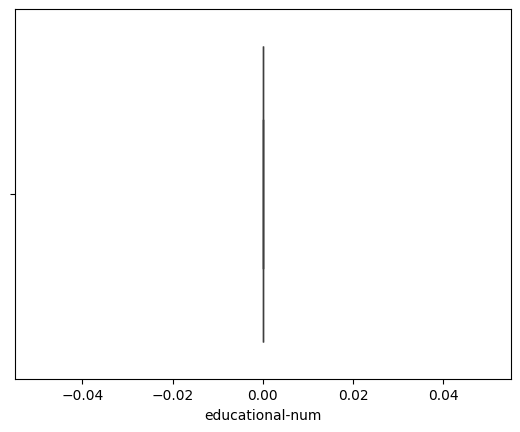

capital-gain


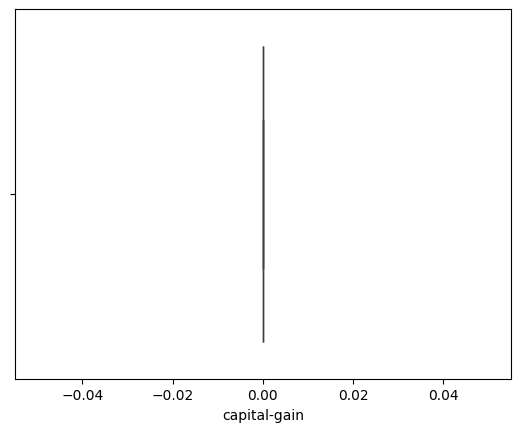

capital-loss


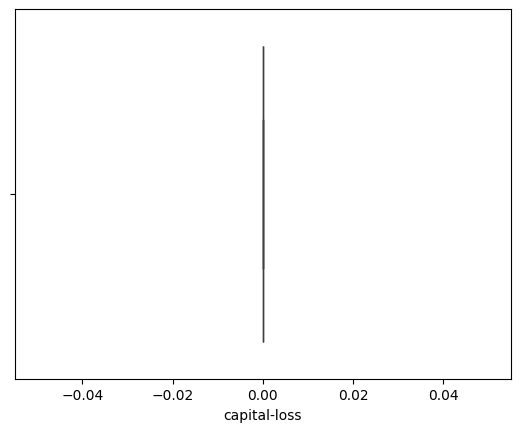

hours-per-week


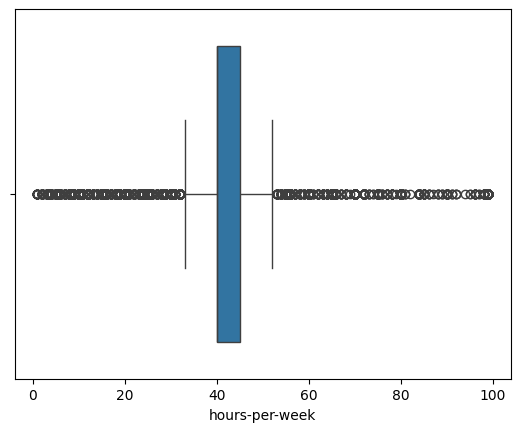

In [68]:
for col_name in df.select_dtypes('number').columns:
    print(col_name)
    sns.boxplot(df,x=col_name)
    plt.show()

#### Remove Higly Correlated Features

#### Drop High Variance Features

#### Optionally drop low information columns if needed

In [69]:
df.drop(['fnlwgt','education', 'relationship','native-country'],axis=1,inplace=True)

In [70]:
df

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
0,19,Private,0.0,Never-married,Other-service,White,Male,0,0,20,<=50K
1,36,Private,0.0,Never-married,Other-service,White,Female,0,0,40,<=50K
2,41,Private,0.0,Divorced,Craft-repair,White,Male,0,0,40,>50K
3,46,Private,0.0,Married-civ-spouse,Farming-fishing,White,Male,0,0,40,<=50K
4,30,Private,0.0,Never-married,Prof-specialty,Black,Male,0,0,45,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
46394,39,Private,0.0,Married-civ-spouse,Exec-managerial,White,Male,0,0,60,>50K
46395,58,Self-emp-inc,0.0,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,>50K
46396,32,Private,0.0,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,<=50K
46397,30,Private,0.0,Never-married,?,Black,Female,0,0,40,<=50K


#### Encode Categorical Variables

In [71]:
df=pd.get_dummies(df,dtype=int,drop_first=True)

In [72]:
df

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,19,0.0,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,36,0.0,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,41,0.0,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
3,46,0.0,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,30,0.0,0,0,45,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46394,39,0.0,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
46395,58,0.0,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
46396,32,0.0,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
46397,30,0.0,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Define X and y

In [73]:
x=df.drop('income_>50K',axis=1)
y=df['income_>50K']

#### Scale the Features

In [74]:
from sklearn.preprocessing import StandardScaler


In [75]:
ss=StandardScaler()
x=ss.fit_transform(x)

#### Train-Test Split

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

#### Train model using Logistic Regression, KNN, Naive Bayes, Decision Tree, Random Forest

# 1 Logistic

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7065
           1       0.67      0.53      0.59      2206

    accuracy                           0.83      9271
   macro avg       0.76      0.72      0.74      9271
weighted avg       0.82      0.83      0.82      9271



In [81]:
print(y_pred1)

[0 0 1 ... 0 0 0]


# 2 KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error_li=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error=1-accuracy_score(y_test,y_pred)
    error_li.append(error)

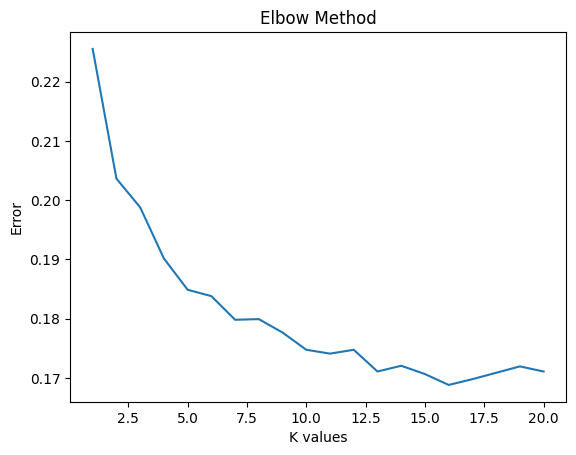

In [83]:
plt.title('Elbow Method')
plt.plot(range(1,21),error_li)
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()


In [89]:
knn=KNeighborsClassifier(n_neighbors=16, metric='euclidean')
knn.fit(x_train,y_train)
y_pred2=knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7065
           1       0.69      0.52      0.59      2206

    accuracy                           0.83      9271
   macro avg       0.78      0.72      0.74      9271
weighted avg       0.82      0.83      0.82      9271



# 3 Naive bays

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
gnb=GaussianNB()

In [92]:
gnb.fit(x_train,y_train)
y_pred3=gnb.predict(x_test)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.37      0.53      7065
           1       0.32      0.94      0.48      2206

    accuracy                           0.51      9271
   macro avg       0.64      0.66      0.50      9271
weighted avg       0.80      0.51      0.52      9271



# 4 Disison tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
dt=DecisionTreeClassifier()

In [97]:
param_dict={'criterion': ['gini','entropy'],
            'max_depth':[5,10,20,None],
            'min_samples_split': [2,5,10,15],
            'min_samples_leaf': [1,5,10,20]}
grid=GridSearchCV(dt, param_grid=param_dict, cv=5)
           

In [98]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 15]})

In [99]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [100]:
best_dt=grid.best_estimator_

In [101]:
y_pred4= best_dt.predict(x_test)

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7065
           1       0.68      0.51      0.58      2206

    accuracy                           0.83      9271
   macro avg       0.77      0.72      0.74      9271
weighted avg       0.82      0.83      0.82      9271



In [104]:
from sklearn.model_selection import ParameterGrid
len(list(ParameterGrid(param_dict)))

128

# 5  forest tree

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [106]:
param_dict={'n_estimators':[5,10,100,200],
    'criterion': ['gini','entropy'],
            'max_depth':[5,10,20,None],
            'min_samples_split': [2,5,10,15],
            'min_samples_leaf': [1,5,10,20]}
len(list(ParameterGrid(param_dict)))
           

512

In [107]:
grid_model=GridSearchCV(rf,param_grid=param_dict,cv=5)

In [ ]:
grid_model.fit(x_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
best_rf=grid_model.best_estimator_

In [ ]:
best_rf=grid_model.best_estimator_

In [ ]:
y_pred=best_rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test,y_pred))

#### Hyperparameter Tuning    

#### STEP 1. Read Dataset 
test_data=pd.read_csv("income data set without answers.csv")

In [73]:
test_data=pd.read_csv("income data set without answers.csv")

In [74]:
test_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,44,Federal-gov,251305,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
1,49,Private,132476,Doctorate,16,Divorced,Tech-support,Unmarried,White,Male,7430,0,40,United-States
2,26,Local-gov,216522,Bachelors,13,Never-married,Prof-specialty,Own-child,Black,Female,0,0,42,United-States
3,31,Private,54318,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,43,Private,169628,Bachelors,13,Never-married,Sales,Unmarried,Black,Female,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,41,Local-gov,235951,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
2439,51,Private,48343,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,50,United-States
2440,56,Private,213105,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,36,United-States
2441,35,Private,143385,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States


In [78]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2443 non-null   int64 
 1   workclass        2443 non-null   object
 2   fnlwgt           2443 non-null   int64 
 3   education        2443 non-null   object
 4   educational-num  2443 non-null   int64 
 5   marital-status   2443 non-null   object
 6   occupation       2443 non-null   object
 7   relationship     2443 non-null   object
 8   race             2443 non-null   object
 9   gender           2443 non-null   object
 10  capital-gain     2443 non-null   int64 
 11  capital-loss     2443 non-null   int64 
 12  hours-per-week   2443 non-null   int64 
 13  native-country   2443 non-null   object
dtypes: int64(6), object(8)
memory usage: 267.3+ KB


#### STEP 2. Do all the same preprocessing on the columns of test_data

In [80]:
test_data=test_data.drop_duplicates()

In [81]:
test_data['native-country'] = test_data['native-country'].replace('?', 'United-States')

In [ ]:
df['workclass'] = df['workclass'].replace('?', 'Private')

In [82]:
q1=test_data['age'].quantile(0.25)
q3=test_data['age'].quantile(0.75)
iqr=q3-q1
lower_whisker=q1-iqr*1.5
upper_whisker=q1+iqr*1.5

In [83]:
test_data['age'][test_data['age']>upper_whisker]=upper_whisker

In [84]:
q1=test_data['fnlwgt'].quantile(0.25)
q3=test_data['fnlwgt'].quantile(0.75)
iqr=q3-q1
lower_whisker=q1-iqr*1.5
upper_whisker=q1+iqr*1.5

In [85]:
test_data['fnlwgt'][test_data['fnlwgt']>upper_whisker]=upper_whisker

In [86]:
q1=test_data['educational-num'].quantile(0.25)
q3=test_data['educational-num'].quantile(0.75)
iqr=q3-q1
lower_whisker=q1-iqr*1.5
upper_whisker=q1+iqr*1.5

In [87]:
test_data['educational-num'][test_data['educational-num']>upper_whisker]=upper_whisker

In [88]:
q1=test_data['capital-gain'].quantile(0.25)
q3=test_data['capital-gain'].quantile(0.75)
iqr=q3-q1
lower_whisker=q1-iqr*1.5
upper_whisker=q1+iqr*1.5

In [89]:
test_data['capital-gain'][test_data['capital-gain']>upper_whisker]=upper_whisker

In [90]:
q1=test_data['capital-loss'].quantile(0.25)
q3=test_data['capital-loss'].quantile(0.75)
iqr=q3-q1
lower_whisker=q1-iqr*1.5
upper_whisker=q1+iqr*1.5

In [91]:
test_data['capital-loss'][test_data['capital-loss']>upper_whisker]=upper_whisker

In [93]:
test_data.drop(['fnlwgt','education', 'relationship','native-country'],axis=1,inplace=True)

In [94]:
test_data=pd.get_dummies(test_data,dtype=int,drop_first=True)

In [118]:
ss=StandardScaler()
test_data=ss.fit_transform(test_data)

#### STEP 3. Predict answers on test_data with your best model
pred=model.predict(test_data)

In [119]:
pred=lr.predict(test_data)
#from sklearn.metrics import classification_report
#print(classification_report(test_data,pred))

#### STEP 4. Save the prediction in an excel with your name instead of mine
pd.DataFrame(pred.tolist(),columns=['prediction']).to_excel('Omkar Prediction.xlsx',index=False)

In [121]:
pd.DataFrame(pred.tolist(),columns=['prediction']).to_excel('Pranjal Boss1.xlsx',index=False)

In [122]:
print(pred)

[0 0 0 ... 0 0 0]


In [123]:
l=[]
for i in pred:
    if i!=2:
        l.append(i)

In [124]:
print(l)

[np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0)

In [106]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
xl=pd.read_excel('yogesh.xlsx')

In [126]:
xl

,prediction
0,0
1,0
2,0
3,1
4,0
...,...
2438,1
2439,1
2440,0
2441,0


In [1]:
pip install --update pip

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\Pranjal Yadav\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\Pranjal Yadav\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\Pranjal Yadav\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\Pranjal Yadav\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\Pranjal Yadav\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] <archive url/path> ...

no such option: --update
